In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pickle

import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("resale_modelling.csv")

In [3]:
mrt = pd.read_csv("mrt_data.csv")

In [4]:
central = pd.read_csv("central.csv")

In [5]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text).strip()

In [6]:
df["street_name"] = df["street_name"].apply(remove_numbers)

In [7]:
df["street_name"] =  df["street_name"] + " SINGAPORE"

In [8]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE SINGAPORE,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE SINGAPORE,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE SINGAPORE,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE SINGAPORE,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE SINGAPORE,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [9]:
df.dropna(inplace = True)

In [10]:
df.drop_duplicates()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
709050,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE SINGAPORE,07 TO 09,60.0,Improved,1986,255000.0,70.0
709051,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1981,275000.0,65.0
709052,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE SINGAPORE,01 TO 03,69.0,New Generation,1980,285000.0,64.0
709053,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1979,290000.0,63.0
709054,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE SINGAPORE,07 TO 09,68.0,New Generation,1980,290000.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...
931982,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD SINGAPORE,04 TO 06,146.0,Maisonette,1988,865000.0,63.0
931983,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD SINGAPORE,10 TO 12,145.0,Apartment,1988,880000.0,63.0
931984,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST SINGAPORE,01 TO 03,146.0,Maisonette,1985,770000.0,60.0
931985,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST SINGAPORE,04 TO 06,146.0,Maisonette,1985,800000.0,60.0


In [11]:
df["street_name"] = df["street_name"].replace("BUANGKOK STH FARMWAY SINGAPORE", "BUANGKOK CRES SINGAPORE")
df["street_name"] = df["street_name"].replace("C'WEALTH CL SINGAPORE", "C'WEALTH AVE SINGAPORE")
df["street_name"] = df["street_name"].replace("C'WEALTH CRES SINGAPORE", "C'WEALTH AVE SINGAPORE")
df["street_name"] = df["street_name"].replace("C'WEALTH DR SINGAPORE", "C'WEALTH AVE SINGAPORE")
df["street_name"] = df["street_name"].replace("EVERTON PK SINGAPORE", "EVERTON PARK SINGAPORE")
df["street_name"] = df["street_name"].replace("JLN MEMBINA BARAT SINGAPORE", "JLN MEMBINA SINGAPORE")
df["street_name"] = df["street_name"].replace("JLN PASAR BARU SINGAPORE", "JLN MEMBINA SINGAPORE")
df["street_name"] = df["street_name"].replace("KG BAHRU HILL SINGAPORE", "KG ARANG RD")
df["street_name"] = df["street_name"].replace("NILE RD SINGAPORE", "CANTONMENT RD SINGAPORE")
df["street_name"] = df["street_name"].replace("OUTRAM PK SINGAPORE", "OUTRAM HILL SINGAPORE")
df["street_name"] = df["street_name"].replace("ST. GEORGE'S RD SINGAPORE", "ST. GEORGE'S LANE SINGAPORE")
df["street_name"] = df["street_name"].replace("KG ARANG RD SINGAPORE", "KG ARANG RD")
df["street_name"] = df["street_name"].replace("KG KAYU RD SINGAPORE", "KG KAYU RD")
df["street_name"] = df["street_name"].replace("NEW MKT RD SINGAPORE", "NEW MKT RD")
df["street_name"] = df["street_name"].replace("SPOTTISWOODE PK RD SINGAPORE", "SPOTTISWOODE PK RD")
df["street_name"] = df["street_name"].replace("WOODLANDS CTR RD SINGAPORE", "WOODLANDS CTR RD ")

In [12]:
df["town"] = df["town"].replace("CENTRAL AREA", "CENTRAL")
df["town"] = df["town"].replace("KALLANG/WHAMPOA", "KALLANG")

In [13]:
df = pd.merge(df, mrt, on='street_name', how='left')

In [14]:
df = pd.merge(df, central, on='town', how='left')

In [15]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,nearest_station_distance,distance_from_central
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE SINGAPORE,07 TO 09,60.0,Improved,1986,255000.0,70.0,0.929801,10.456630
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1981,275000.0,65.0,0.929801,10.456630
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE SINGAPORE,01 TO 03,69.0,New Generation,1980,285000.0,64.0,0.929801,10.456630
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1979,290000.0,63.0,0.929801,10.456630
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE SINGAPORE,07 TO 09,68.0,New Generation,1980,290000.0,64.0,0.929801,10.456630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222932,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD SINGAPORE,04 TO 06,146.0,Maisonette,1988,865000.0,63.0,1.041003,15.851187
222933,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD SINGAPORE,10 TO 12,145.0,Apartment,1988,880000.0,63.0,1.041003,15.851187
222934,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST SINGAPORE,01 TO 03,146.0,Maisonette,1985,770000.0,60.0,0.938288,15.851187
222935,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST SINGAPORE,04 TO 06,146.0,Maisonette,1985,800000.0,60.0,0.938288,15.851187


In [16]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease             0
nearest_station_distance    0
distance_from_central       0
dtype: int64

In [17]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,nearest_station_distance,distance_from_central
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE SINGAPORE,07 TO 09,60.0,Improved,1986,255000.0,70.0,0.929801,10.45663
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1981,275000.0,65.0,0.929801,10.45663
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE SINGAPORE,01 TO 03,69.0,New Generation,1980,285000.0,64.0,0.929801,10.45663
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE SINGAPORE,01 TO 03,68.0,New Generation,1979,290000.0,63.0,0.929801,10.45663
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE SINGAPORE,07 TO 09,68.0,New Generation,1980,290000.0,64.0,0.929801,10.45663


In [18]:
df['flat_type'] = df['flat_type'].str.replace('-', ' ').str.strip()

In [19]:
df['flat_model'] = df['flat_model'].str.upper()

In [20]:
def date_to_ordinal(date_str, date_format="%Y-%m-%d"):
    k = str(date_str)
    date_str =  k[:4] + "-" + k[5:7] + "-" + "01"
    date = datetime.strptime(date_str, date_format)
    return date.toordinal()

In [21]:
df["month"] = df["month"].apply(lambda i : date_to_ordinal(i))

In [22]:
def get_median(s):
    start = int(s[0:2])
    end = int(s[-2:])
    return int((start+end)/2)

In [23]:
df["storey_range"] = df["storey_range"].apply(lambda i : get_median(i))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222937 entries, 0 to 222936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     222937 non-null  int64  
 1   town                      222937 non-null  object 
 2   flat_type                 222937 non-null  object 
 3   block                     222937 non-null  object 
 4   street_name               222937 non-null  object 
 5   storey_range              222937 non-null  int64  
 6   floor_area_sqm            222937 non-null  float64
 7   flat_model                222937 non-null  object 
 8   lease_commence_date       222937 non-null  int64  
 9   resale_price              222937 non-null  float64
 10  remaining_lease           222937 non-null  float64
 11  nearest_station_distance  222937 non-null  float64
 12  distance_from_central     222937 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory us

In [25]:
df['calculated_remaining_lease'] = 100 - (2024 - df['lease_commence_date'])
df.drop(['lease_commence_date', 'remaining_lease',"block","street_name","town"], axis=1, inplace=True)

In [26]:
df_numeric= df[["storey_range","floor_area_sqm","resale_price","nearest_station_distance","calculated_remaining_lease","distance_from_central"]]

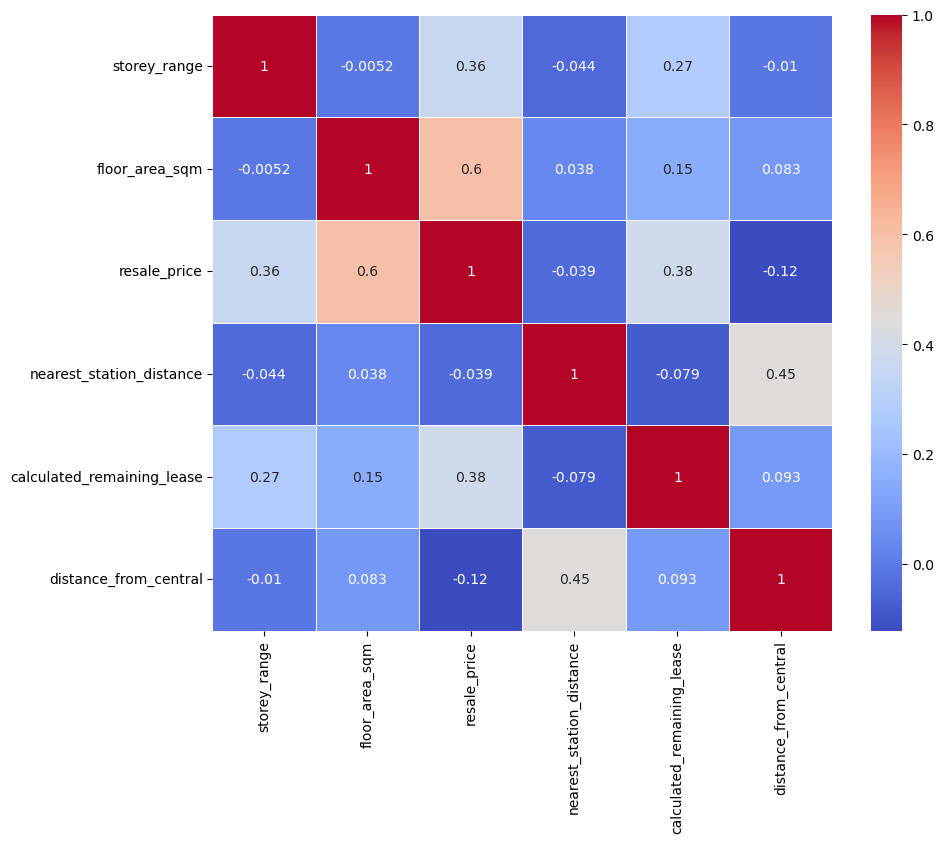

In [27]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

1.6172192265708707


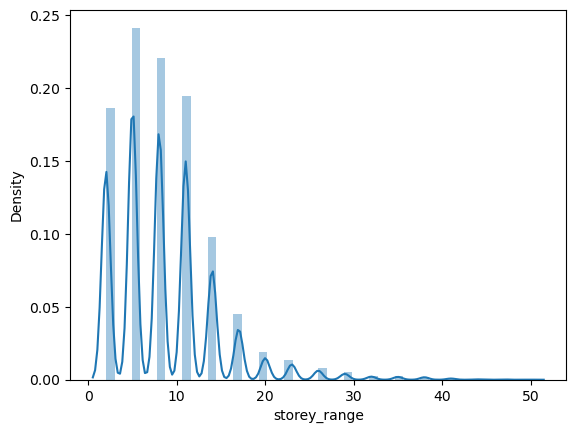

0.27121500172437885


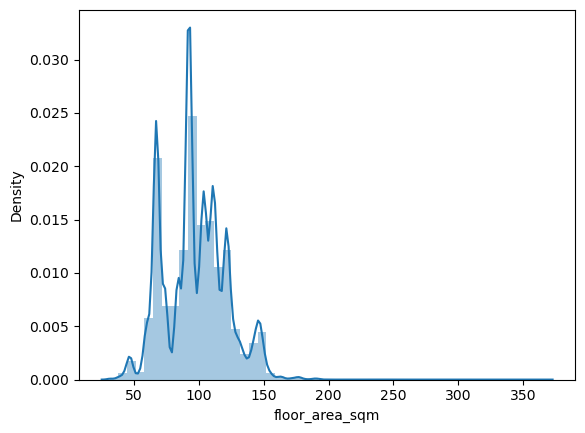

1.012489933949954


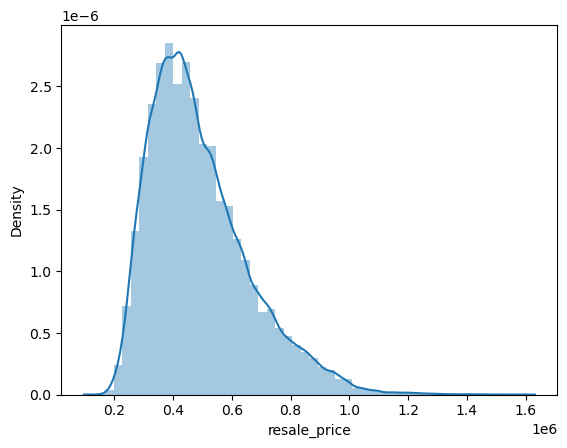

0.5317181894308385


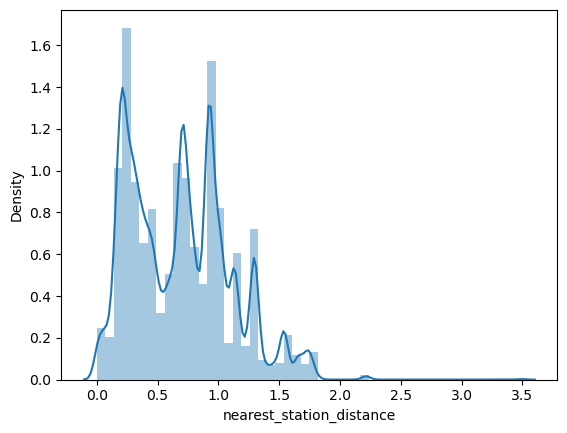

0.13133799245249095


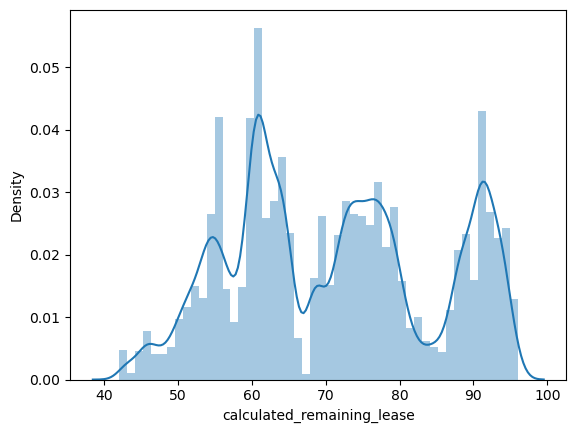

0.0727236606203108


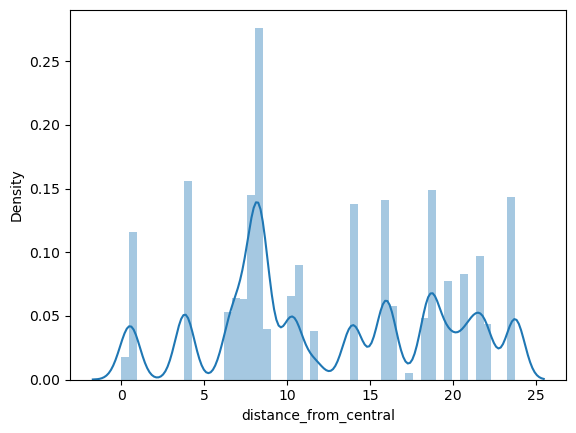

In [28]:
for i in df_numeric:
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

storey_range


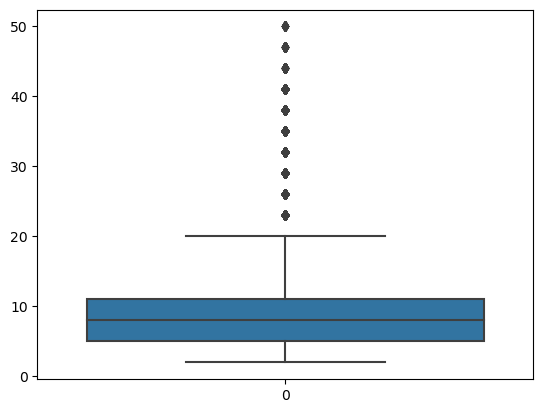

floor_area_sqm


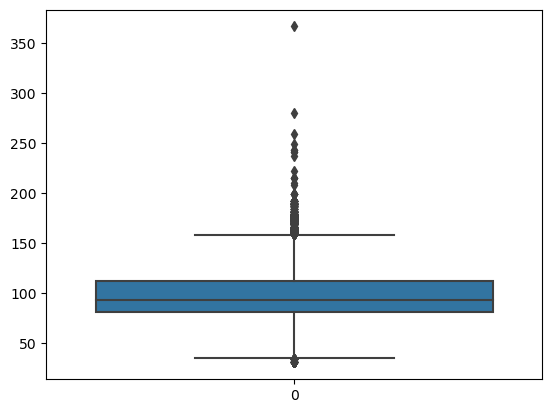

resale_price


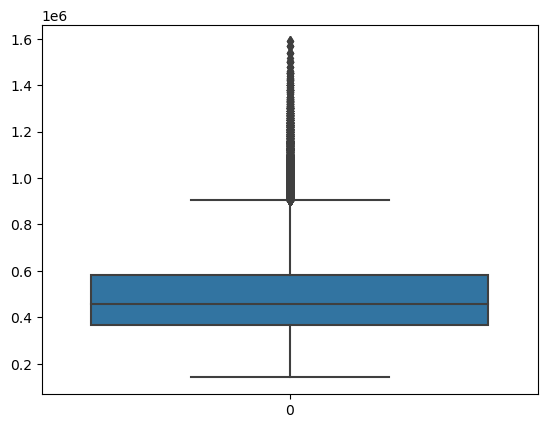

nearest_station_distance


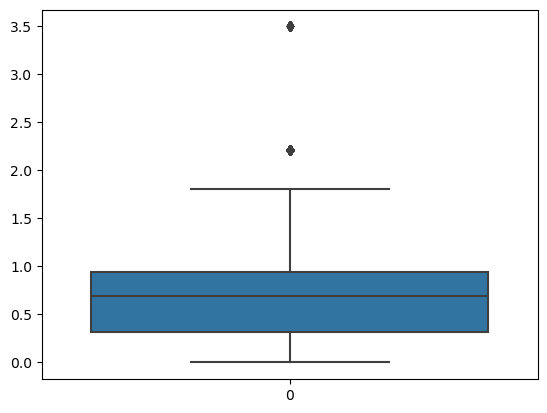

calculated_remaining_lease


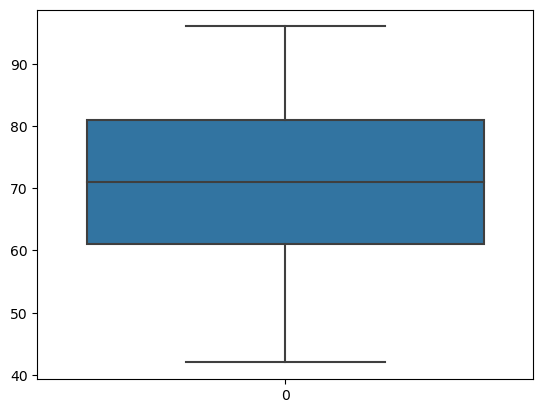

distance_from_central


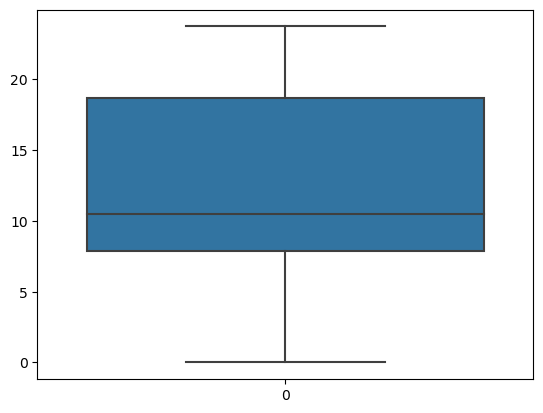

In [29]:
for i in df_numeric:
    sns.boxplot(df[i])
    print(i)
    plt.show()

-0.3732682913446012


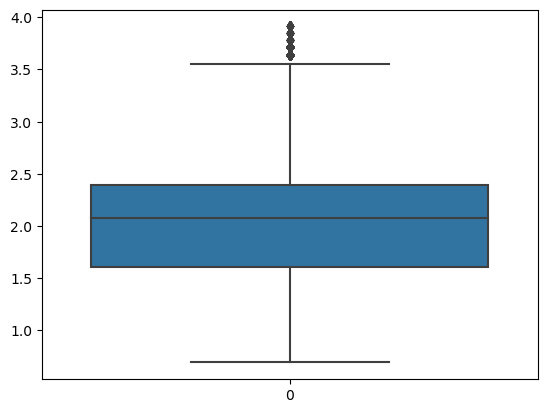

In [30]:
df_numeric['storey_range'] = np.log(df_numeric['storey_range'])
print(df_numeric["storey_range"].skew())
sns.boxplot(df_numeric["storey_range"])
plt.show()

-0.40765281017564126


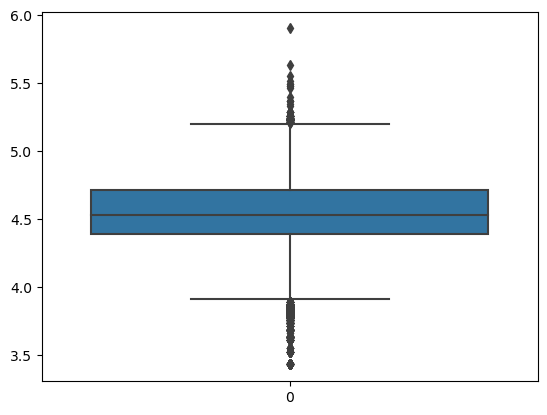

In [31]:
df_numeric['floor_area_sqm'] = np.log(df_numeric['floor_area_sqm'])
print(df_numeric["floor_area_sqm"].skew())
sns.boxplot(df_numeric["floor_area_sqm"])
plt.show()

0.14992106417172515


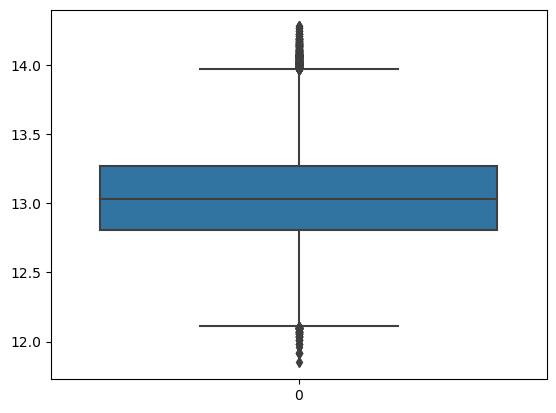

In [32]:
df_numeric['resale_price'] = np.log(df_numeric['resale_price'])
print(df_numeric["resale_price"].skew())
sns.boxplot(df_numeric["resale_price"])
plt.show()

In [33]:
df_numeric

,storey_range,floor_area_sqm,resale_price,nearest_station_distance,calculated_remaining_lease,distance_from_central
0,2.079442,4.094345,12.449019,0.929801,62,10.456630
1,0.693147,4.219508,12.524526,0.929801,57,10.456630
2,0.693147,4.234107,12.560244,0.929801,56,10.456630
3,0.693147,4.219508,12.577636,0.929801,55,10.456630
4,2.079442,4.219508,12.577636,0.929801,56,10.456630
...,...,...,...,...,...,...
222932,1.609438,4.983607,13.670485,1.041003,64,15.851187
222933,2.397895,4.976734,13.687677,1.041003,64,15.851187
222934,0.693147,4.983607,13.554146,0.938288,61,15.851187
222935,1.609438,4.983607,13.592367,0.938288,61,15.851187


In [34]:
X = df_numeric.copy()

In [35]:
X.isnull().sum()

storey_range                  0
floor_area_sqm                0
resale_price                  0
nearest_station_distance      0
calculated_remaining_lease    0
distance_from_central         0
dtype: int64

In [36]:
flat_type_encoder = OneHotEncoder(handle_unknown='ignore')
flat_type_encoder.fit(df[['flat_type']])
flat_type_encoded = flat_type_encoder.fit_transform(df[['flat_type']]).toarray()
flat_model_encoder = OneHotEncoder(handle_unknown='ignore')
flat_model_encoder.fit(df[['flat_model']])
flat_model_encoded = flat_model_encoder.fit_transform(df[['flat_model']]).toarray()

In [37]:
X = np.concatenate((X[["storey_range","floor_area_sqm","nearest_station_distance","calculated_remaining_lease","distance_from_central"]], flat_type_encoded,flat_model_encoded), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
y = df_numeric["resale_price"]

In [39]:
"""X = df.drop(columns=["resale_price"])
scaler = StandardScaler()
X = scaler.fit_transform(X)"""

'X = df.drop(columns=["resale_price"])\nscaler = StandardScaler()\nX = scaler.fit_transform(X)'

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
regressor = DecisionTreeRegressor()
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5}


In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print('Mean squared error:', mse)
print('Root Mean squared error:', np.sqrt(mse))
print('R-squared:', r2)

Mean Absolute Error: 0.11849881046857687
Mean squared error: 0.022480148292310036
Root Mean squared error: 0.14993381303865394
R-squared: 0.796127224276042


In [43]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('flat_type_encoder.pkl', 'wb') as f:
    pickle.dump(flat_type_encoder, f)
with open('flat_model_encoder.pkl', 'wb') as f:
    pickle.dump(flat_model_encoder, f)

In [106]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
931982,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0
931983,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,880000.0,63.0
931984,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0
931985,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.0
931986,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,775000.0,60.0


In [107]:
s_town = "YISHUN"
s_type = "EXECUTIVE"
s_model = "Maisonette"
s_street = "YISHUN ST SINGAPORE"
s_range = "01 to 03"
s_lease = 1985

In [108]:
s_lease = 100 - (2024 - s_lease)

In [109]:
s_street = mrt.loc[mrt['street_name'] == s_street, 'nearest_station_distance'].values 

In [110]:
s_town = central.loc[central['town'] == s_town, 'distance_from_central'].values 

In [111]:
s_range = get_median(s_range)

In [112]:
floor_area_sqm = 146.0

In [113]:
testing = np.array([[s_range,floor_area_sqm,s_street[0],s_lease,s_town[0],s_type,s_model]])
testing_type = flat_type_encoder.transform(testing[:, [5]]).toarray()
testing_status = flat_model_encoder.transform(testing[:, [6]]).toarray()
testing = np.concatenate((testing[:, [0,1,2, 3, 4,]], testing_type, testing_status), axis=1)
tester = scaler.transform(testing)
new_pred = best_model.predict(tester)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [634931.37674446]
